# 3. Merge individual images to stack

The shown images were acquired in [Rita Mateus Laboratory](https://www.ritamateus.com/).

In [15]:
import napari
from os import listdir
from skimage.io import imread
from skimage.segmentation import relabel_sequential
from skimage.measure import label
import numpy as np
import os
import pandas as pd
from os.path import isfile, join
from napari_skimage_regionprops._table import add_table
from napari_clusters_plotter._dimensionality_reduction import DimensionalityReductionWidget
from napari_clusters_plotter._dock_widget import PlotterWidget
from napari_time_slicer._function import convert_to_2d_timelapse
from napari.utils import nbscreenshot

## Concatenate dataframes of individual label images

In [16]:
#reading in the folder with the predicted labels (PL)
df_folder_PL = 'imgs/7. dataframes of PL/'

In [17]:
#append directory and sort
def get_sorted_list(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith('csv')]
    return sorted(files)

In [18]:
#get a sorted list of the files in your folder
df_list = get_sorted_list(df_folder_PL)
df_list

['imgs/7. dataframes of PL/img2_20220520_mutant_56hpf_2.tif.csv',
 'imgs/7. dataframes of PL/img3_l3_20220520_mutant_56hpf_3.tif.csv',
 'imgs/7. dataframes of PL/img3_l5_20220520_mutant_56hpf_3.tif.csv',
 'imgs/7. dataframes of PL/img4_l2_20220520_mutant_56hpf_4.tif.csv',
 'imgs/7. dataframes of PL/img4_l4_20220520_mutant_56hpf_4.tif.csv',
 'imgs/7. dataframes of PL/img5_l1_20220520_mutant_56hpf_5.tif.csv']

## Merge individual label images to "stack" in napari

In [28]:
#get folder
image_folder = 'imgs/2. normalized images/'
label_folder = 'imgs/6. bad-label-excluded labels/'

In [21]:
def get_sorted_image_list(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith('tif')]
    return sorted(files)

In [29]:
image_list = get_sorted_image_list(image_folder)
label_list = get_sorted_image_list(label_folder)

In [23]:
df_all_labels = pd.DataFrame()

In [24]:
#merge individual tables 
for i, df in enumerate(df_list):
    df_one_image = pd.read_csv(df)
    df_all_labels = pd.concat([df_all_labels, df_one_image], ignore_index = True)

In [25]:
df_all_labels

,Unnamed: 0,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter_skimage,...,roundness_simpleitk,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,perimeter_simpleitk,perimeter_on_border,perimeter_on_border_ratio
0,0,1,214,336,16.506764,236,3.666667,1.246885,0.000000,58.941125,...,0.879628,13.988563,19.478288,51.857529,8.253382,214,0,58.953907,0.0,0.0
1,1,2,232,368,17.186959,254,5.000000,1.511494,0.000000,61.112698,...,0.890703,13.144561,22.472533,53.994425,8.593480,232,0,60.619988,0.0,0.0
2,2,3,482,1040,24.772999,545,6.666667,1.904219,0.000000,107.568542,...,0.740814,13.447363,45.637309,77.826670,12.386499,482,0,105.055589,0.0,0.0
3,3,4,382,595,22.053968,436,8.000000,2.003927,0.000000,89.254834,...,0.793634,14.049873,34.617929,69.284584,11.026984,382,0,87.300406,0.0,0.0
4,0,1,292,496,19.281752,330,3.866667,1.369635,0.200000,81.597980,...,0.756802,11.442317,32.492190,60.575409,9.640876,292,0,80.041253,0.0,0.0
5,1,2,318,483,20.121883,348,5.000000,1.635639,0.133333,76.083261,...,0.844971,16.213116,24.973002,63.214760,10.060941,318,0,74.812972,0.0,0.0
6,2,3,809,1316,32.094404,876,4.733333,1.832303,0.200000,121.296465,...,0.856810,22.846475,45.085765,100.827545,16.047202,809,0,117.677776,0.0,0.0
7,3,4,1899,3036,49.171962,2031,7.000000,2.075162,0.133333,188.308658,...,0.852485,37.546382,64.397201,154.478276,24.585981,1899,0,181.209319,0.0,0.0
8,0,1,485,988,24.849973,559,6.375000,1.534278,0.000000,109.083261,...,0.733095,14.527596,42.506771,78.068494,12.424987,485,0,106.491633,0.0,0.0
9,1,2,1231,2340,39.589871,1423,5.125000,1.705930,0.000000,179.231493,...,0.719764,22.507891,69.635929,124.375248,19.794935,1231,0,172.799977,0.0,0.0


In [26]:
#relabel seqquentially and save table as csv-file
df_all_labels.loc[:,"label"] = np.arange(1,df_all_labels.shape[0]+1)
df_all_labels.to_csv("imgs/df_PL.csv")

C:\Users\maral\AppData\Local\Temp\ipykernel_10964\2746299117.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_all_labels.loc[:,"label"] = np.arange(1,df_all_labels.shape[0]+1)


In [30]:
#open napari and append table
viewer = napari.Viewer()
viewer.open(image_list, stack=True, layer_type = "image", name = "normalized images")
viewer.open(label_list,stack=True, layer_type = "labels", name = "labels")
label_layer = viewer.layers["labels"]

#convert folders to 2D timelaps --> behaves like a stack
label_layer = convert_to_2d_timelapse(viewer.layers["labels"],viewer)

timelapse_label_image = np.asarray(label_layer.data)

In [31]:
# relabel image
relabeled_timelapse = []
relabeled_image = np.zeros((1,))
for i in range(timelapse_label_image.shape[0]):
    relabeled_image,forward_map,inverse_map = relabel_sequential(timelapse_label_image[i], offset=relabeled_image.max()+1)
    relabeled_timelapse.append(relabeled_image)

relabeled_timelapse = np.asarray(relabeled_timelapse)

#append relabeled labels to napari, remove unrelabeled labels and add table
viewer.add_labels(relabeled_timelapse,  features = df_all_labels, name = "relabeled timelapse")
relabeled_timelapse = viewer.layers["relabeled timelapse"]
add_table(relabeled_timelapse, viewer)
viewer.layers.pop("labels")

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


<Labels layer 'labels' at 0x23012a678b0>

Now your napari window should look like this:

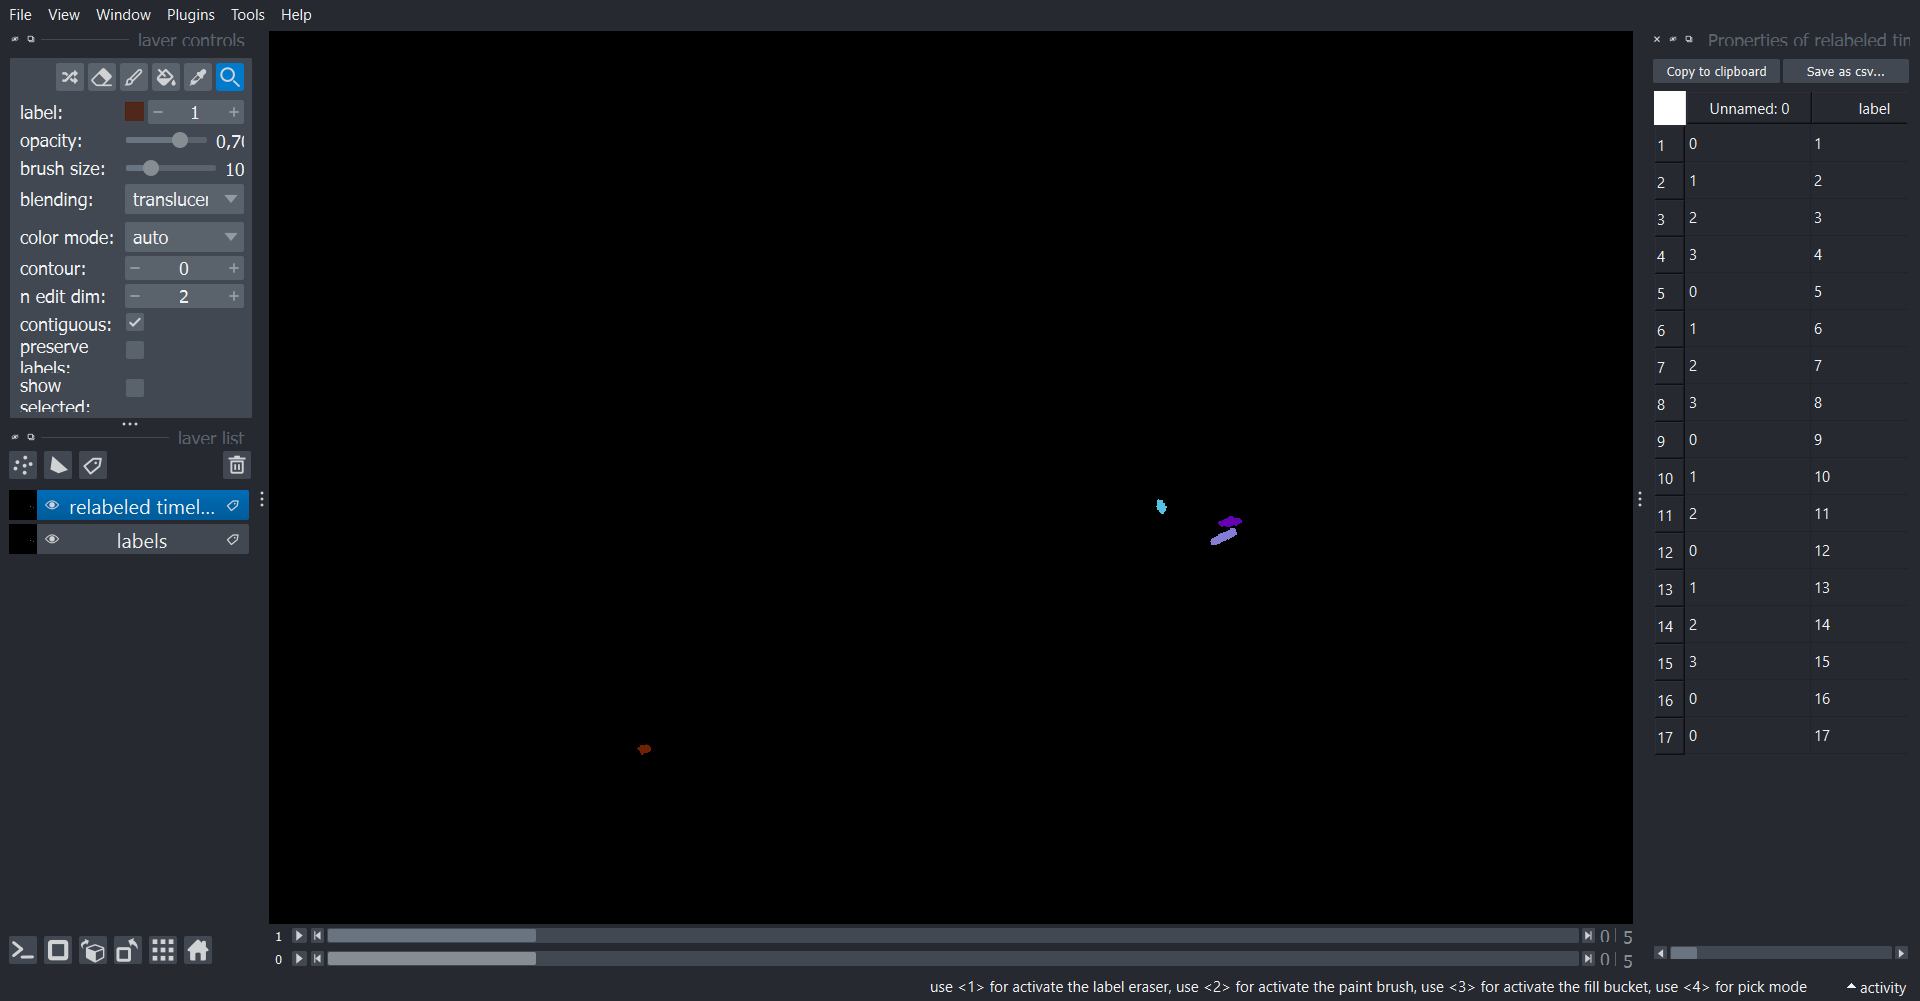

In [33]:
nbscreenshot(viewer)

## Dimensionality reduction

This command opens the dimensionality reduction widget:

In [14]:
dimensionality_reduction_widget = DimensionalityReductionWidget(viewer)
dimensionality_reduction_dock_widget = viewer.window.add_dock_widget(dimensionality_reduction_widget)

Now you can select in napari `relabeled_timelapse` and a Dimensionality Reduction Method, for example `UMAP` and  click the `Run` button.

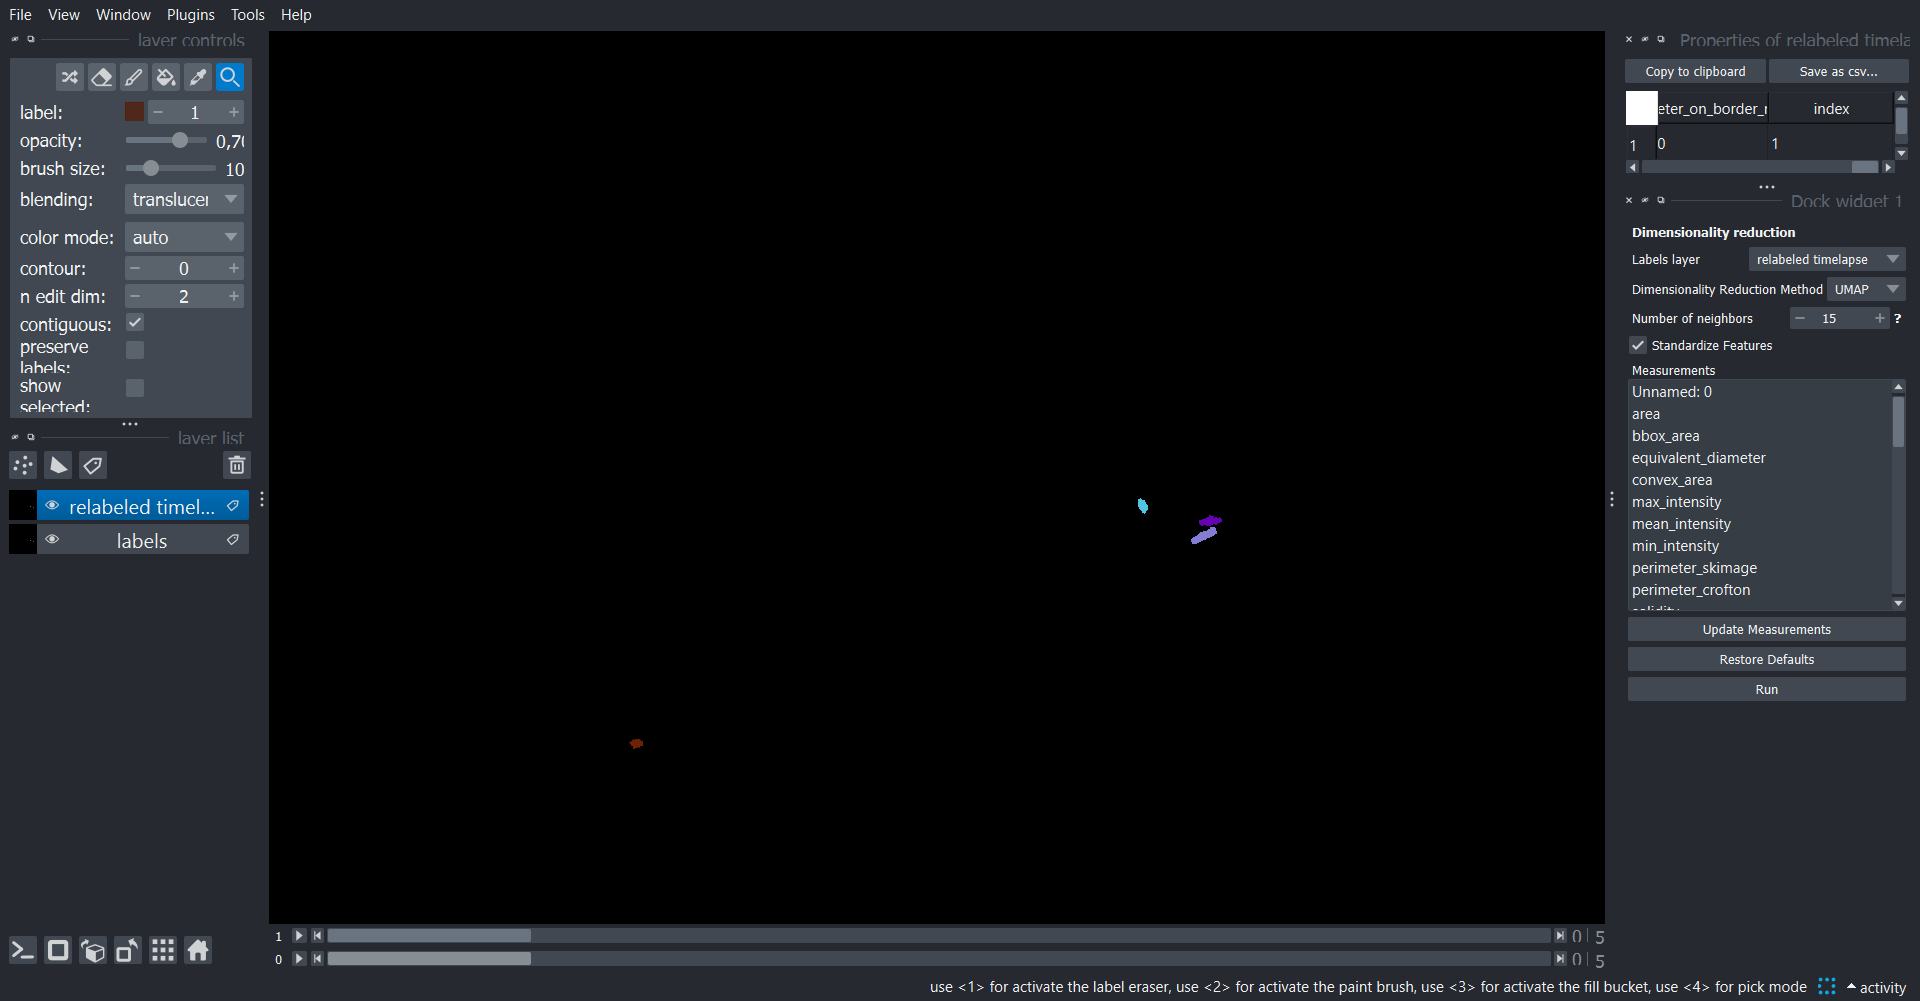

UMAP(random_state=133, verbose=True)
Fri Mar 31 11:58:44 2023 Construct fuzzy simplicial set
Fri Mar 31 11:58:45 2023 Finding Nearest Neighbors
Fri Mar 31 11:58:52 2023 Finished Nearest Neighbor Search
Fri Mar 31 11:58:59 2023 Construct embedding


Dimensionality reduction progress:   0%|            0/500 [00:00]

Fri Mar 31 11:59:01 2023 Finished embedding
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
Dimensionality reduction finished


In [35]:
nbscreenshot(viewer)

Our UMAP columns were automatically added to the table:

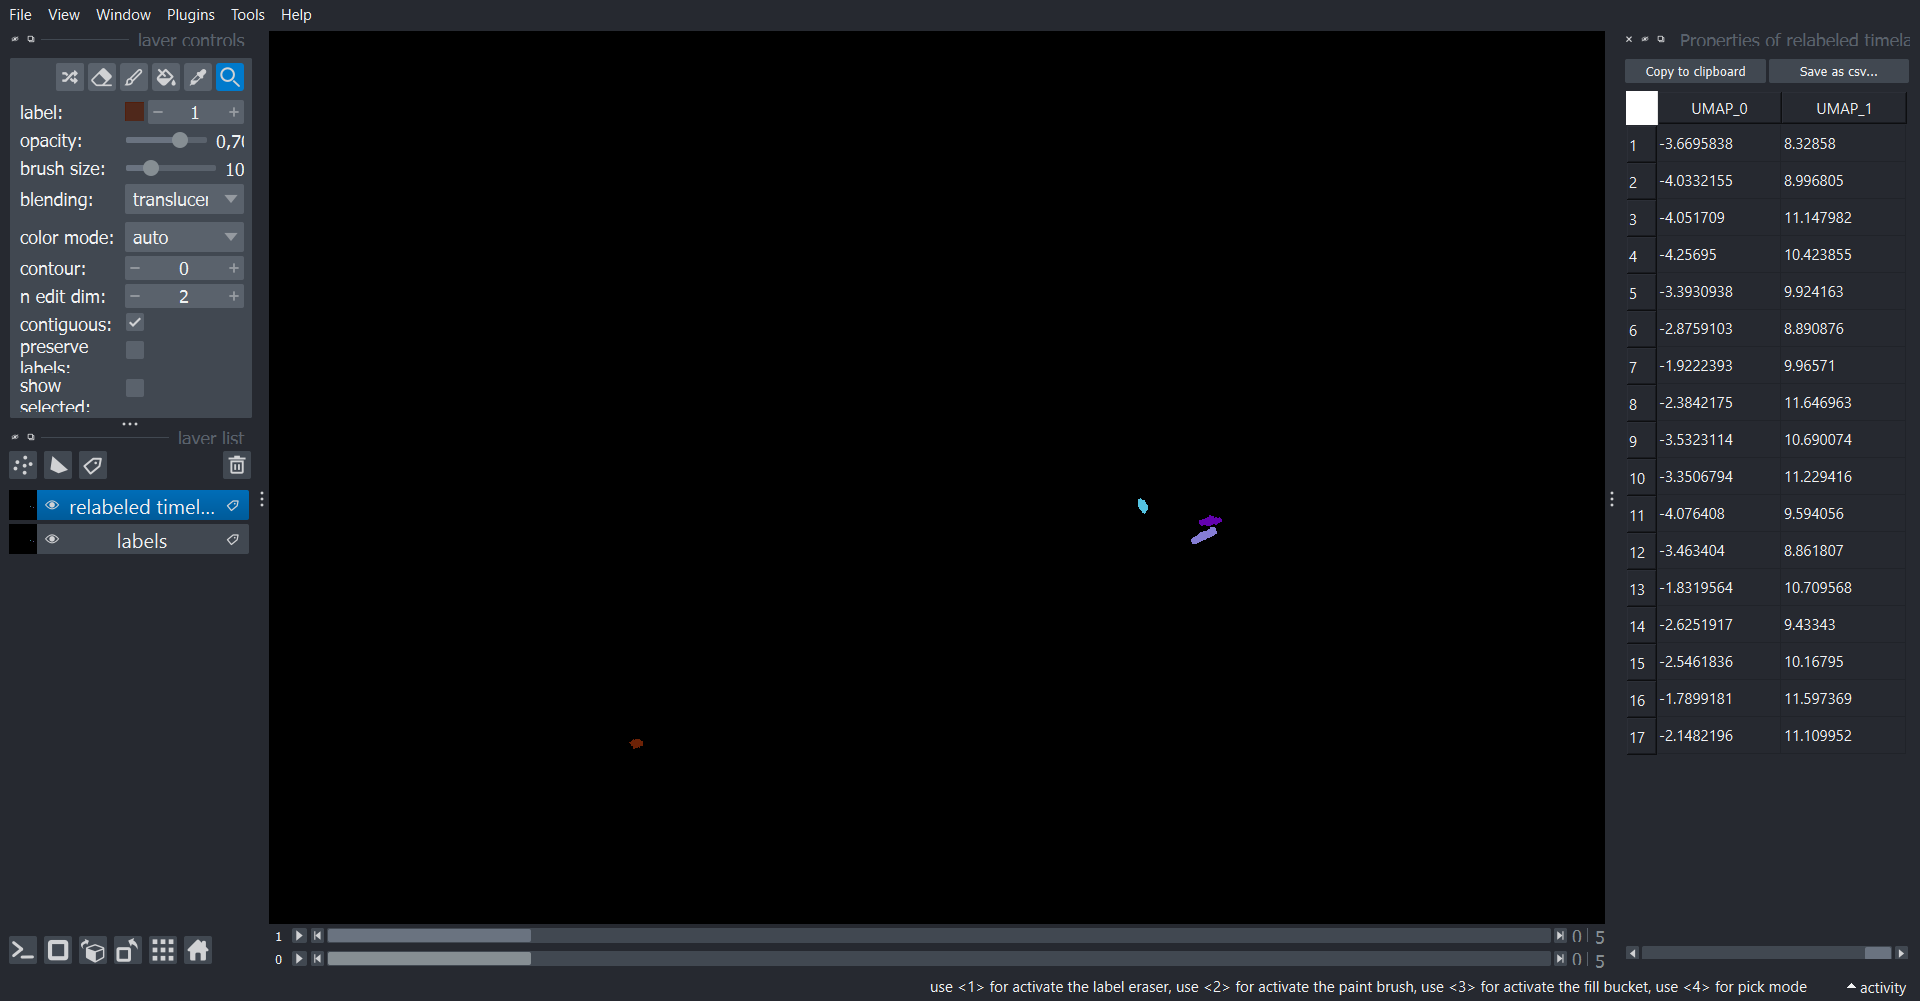

In [38]:
nbscreenshot(viewer)

In [40]:
dimensionality_reduction_widget.hide()

## Plotting

This command opens the plotter widget:

In [41]:
plotter_widget = PlotterWidget(viewer)
plotter_dock_widget = viewer.window.add_dock_widget(plotter_widget)

C:\Users\maral\mambaforge\envs\stardist_env6\lib\site-packages\napari_clusters_plotter\_plotter.py:172: UserWarning: No axis(-es) was/were selected! If you cannot see anything in axes selection boxes, but you have performed measurements/dimensionality reduction before, try clicking Update Axes Selection Boxes
  warnings.warn(


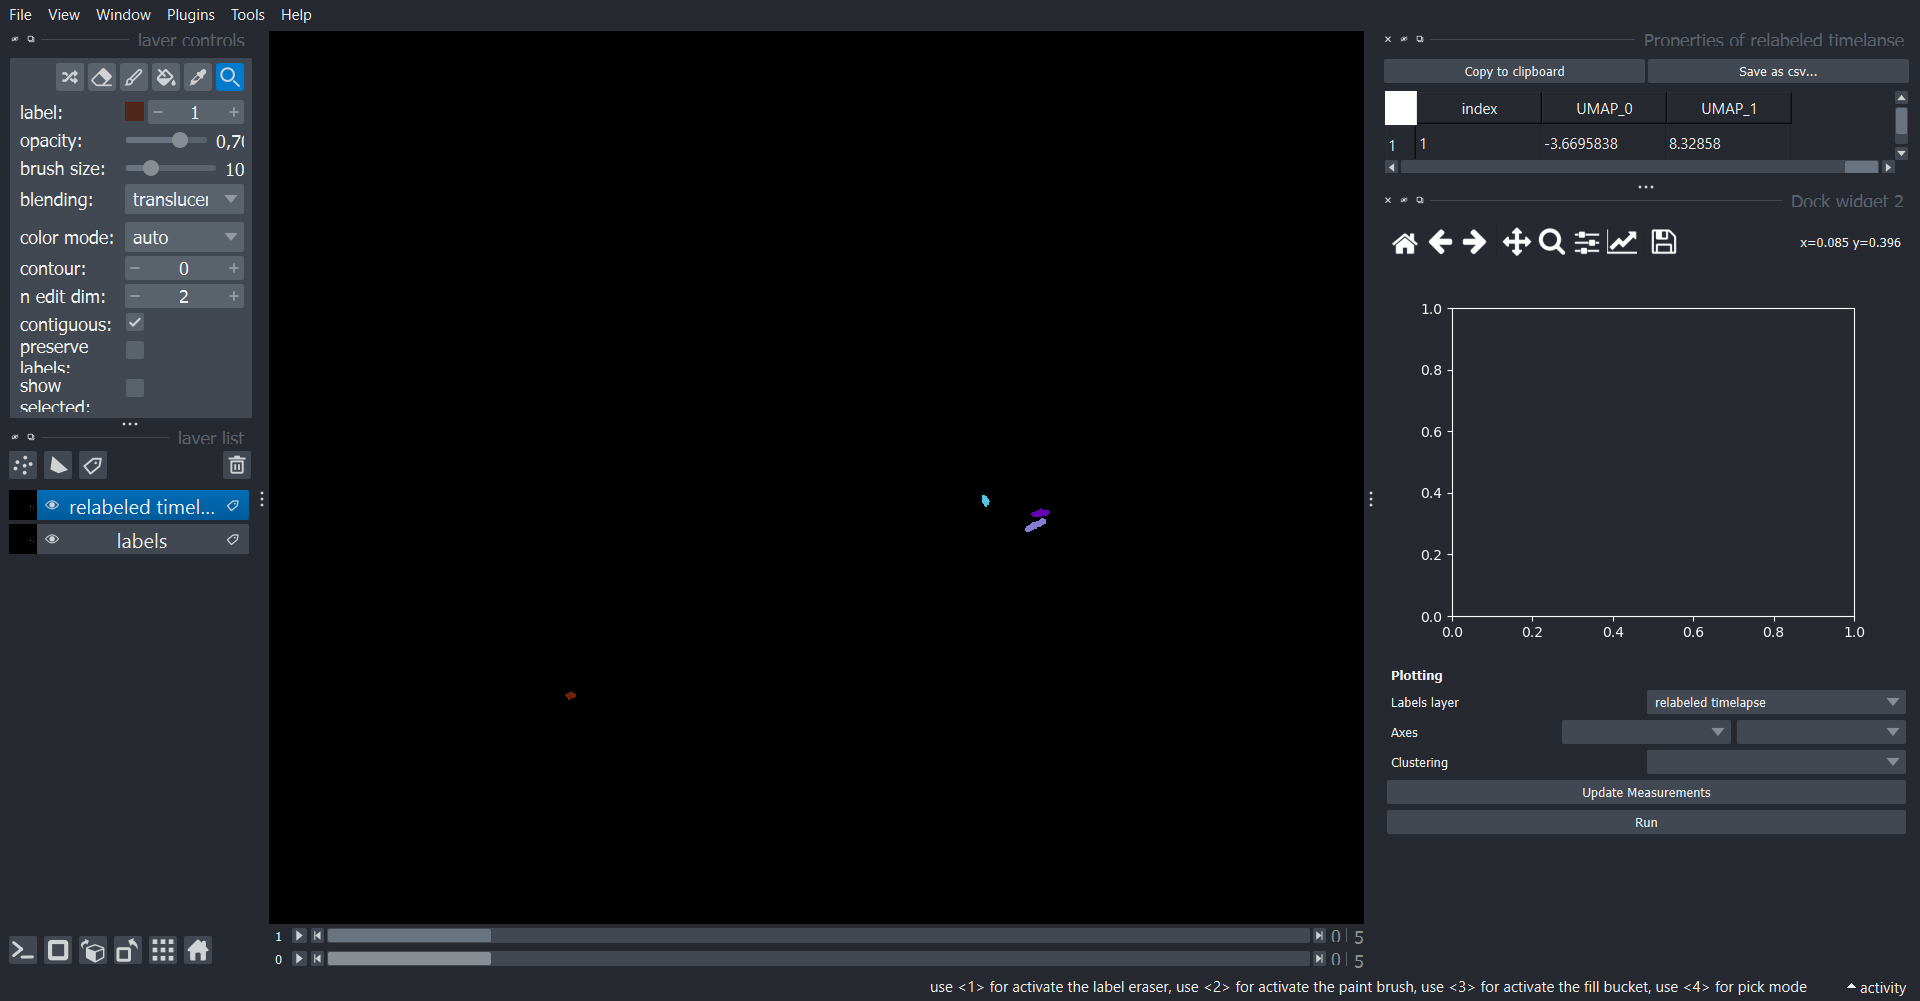

In [42]:
nbscreenshot(viewer)

Now youcan select the measurements you want to plot against each other in napari.